# IMDB 5000 movie metadata

We will start by loading the dataset into a pandas dataframe, and inspect the attributes of the first entry

In [28]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

df = pd.read_csv("./data/movie_metadata.csv")
print(df.iloc[1])


color                                                                    Color
director_name                                                   Gore Verbinski
num_critic_for_reviews                                                     302
duration                                                                   169
director_facebook_likes                                                    563
actor_3_facebook_likes                                                    1000
actor_2_name                                                     Orlando Bloom
actor_1_facebook_likes                                                   40000
gross                                                              3.09404e+08
genres                                                Action|Adventure|Fantasy
actor_1_name                                                       Johnny Depp
movie_title                          Pirates of the Caribbean: At World's End 
num_voted_users                                     

## 1. A description of the data set.

### Problem of interest 

The data consists of 28 attributes, regarded as meta data of movies.

### Where the dataset was obtained

The dataset was provided by kaggle.com

### What have previously been done to the data

The data has been scraped from the IMDB web site, using a python script.
The data has not been pre-proccesed, which means we will expect some NaN values.

## 3. data visualization and PCA

Before we start, we will take alle the numeric data of the dataset, and drop the lines with NA.
We drop the lines, because it is assumed the web scrapper made an error while scraping for the movie.

In [92]:
df_numeric = df._get_numeric_data()
df_numeric = df_numeric.dropna()
df_std = (df_numeric - df_numeric.mean())/df_numeric.std()

Next we will use boxplots, to investigete wether or not the dataset ontains outliers

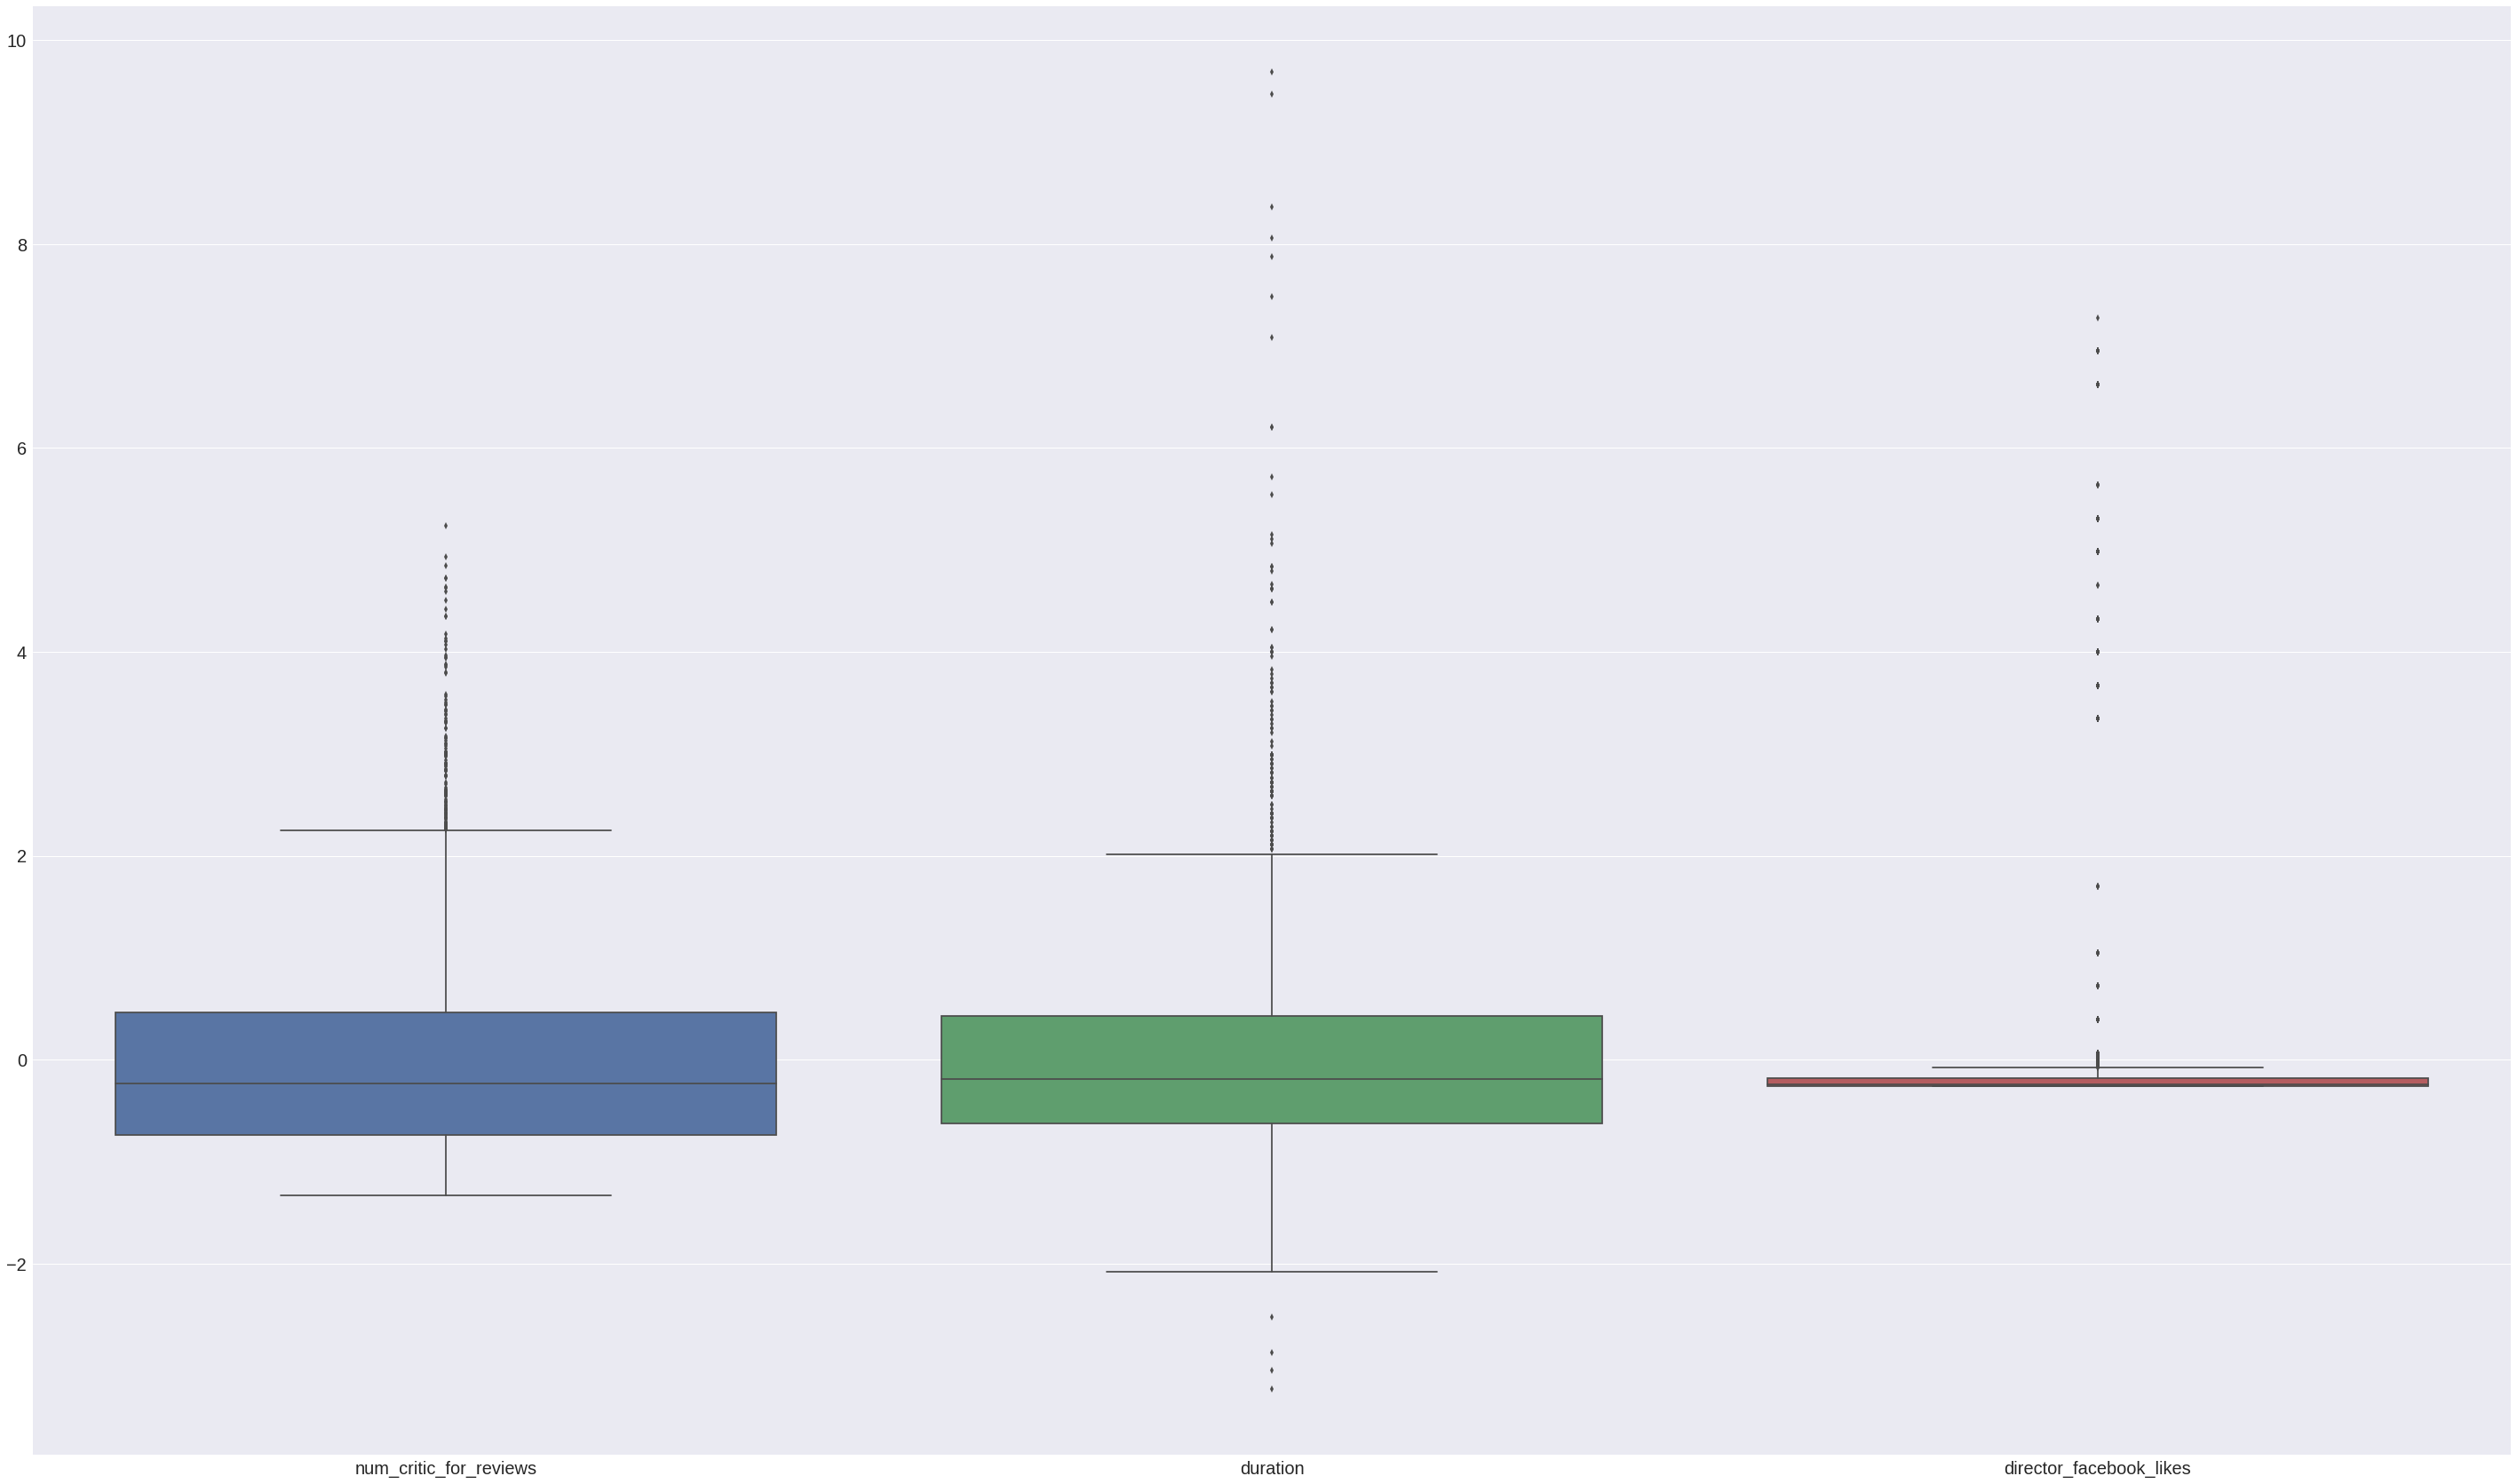

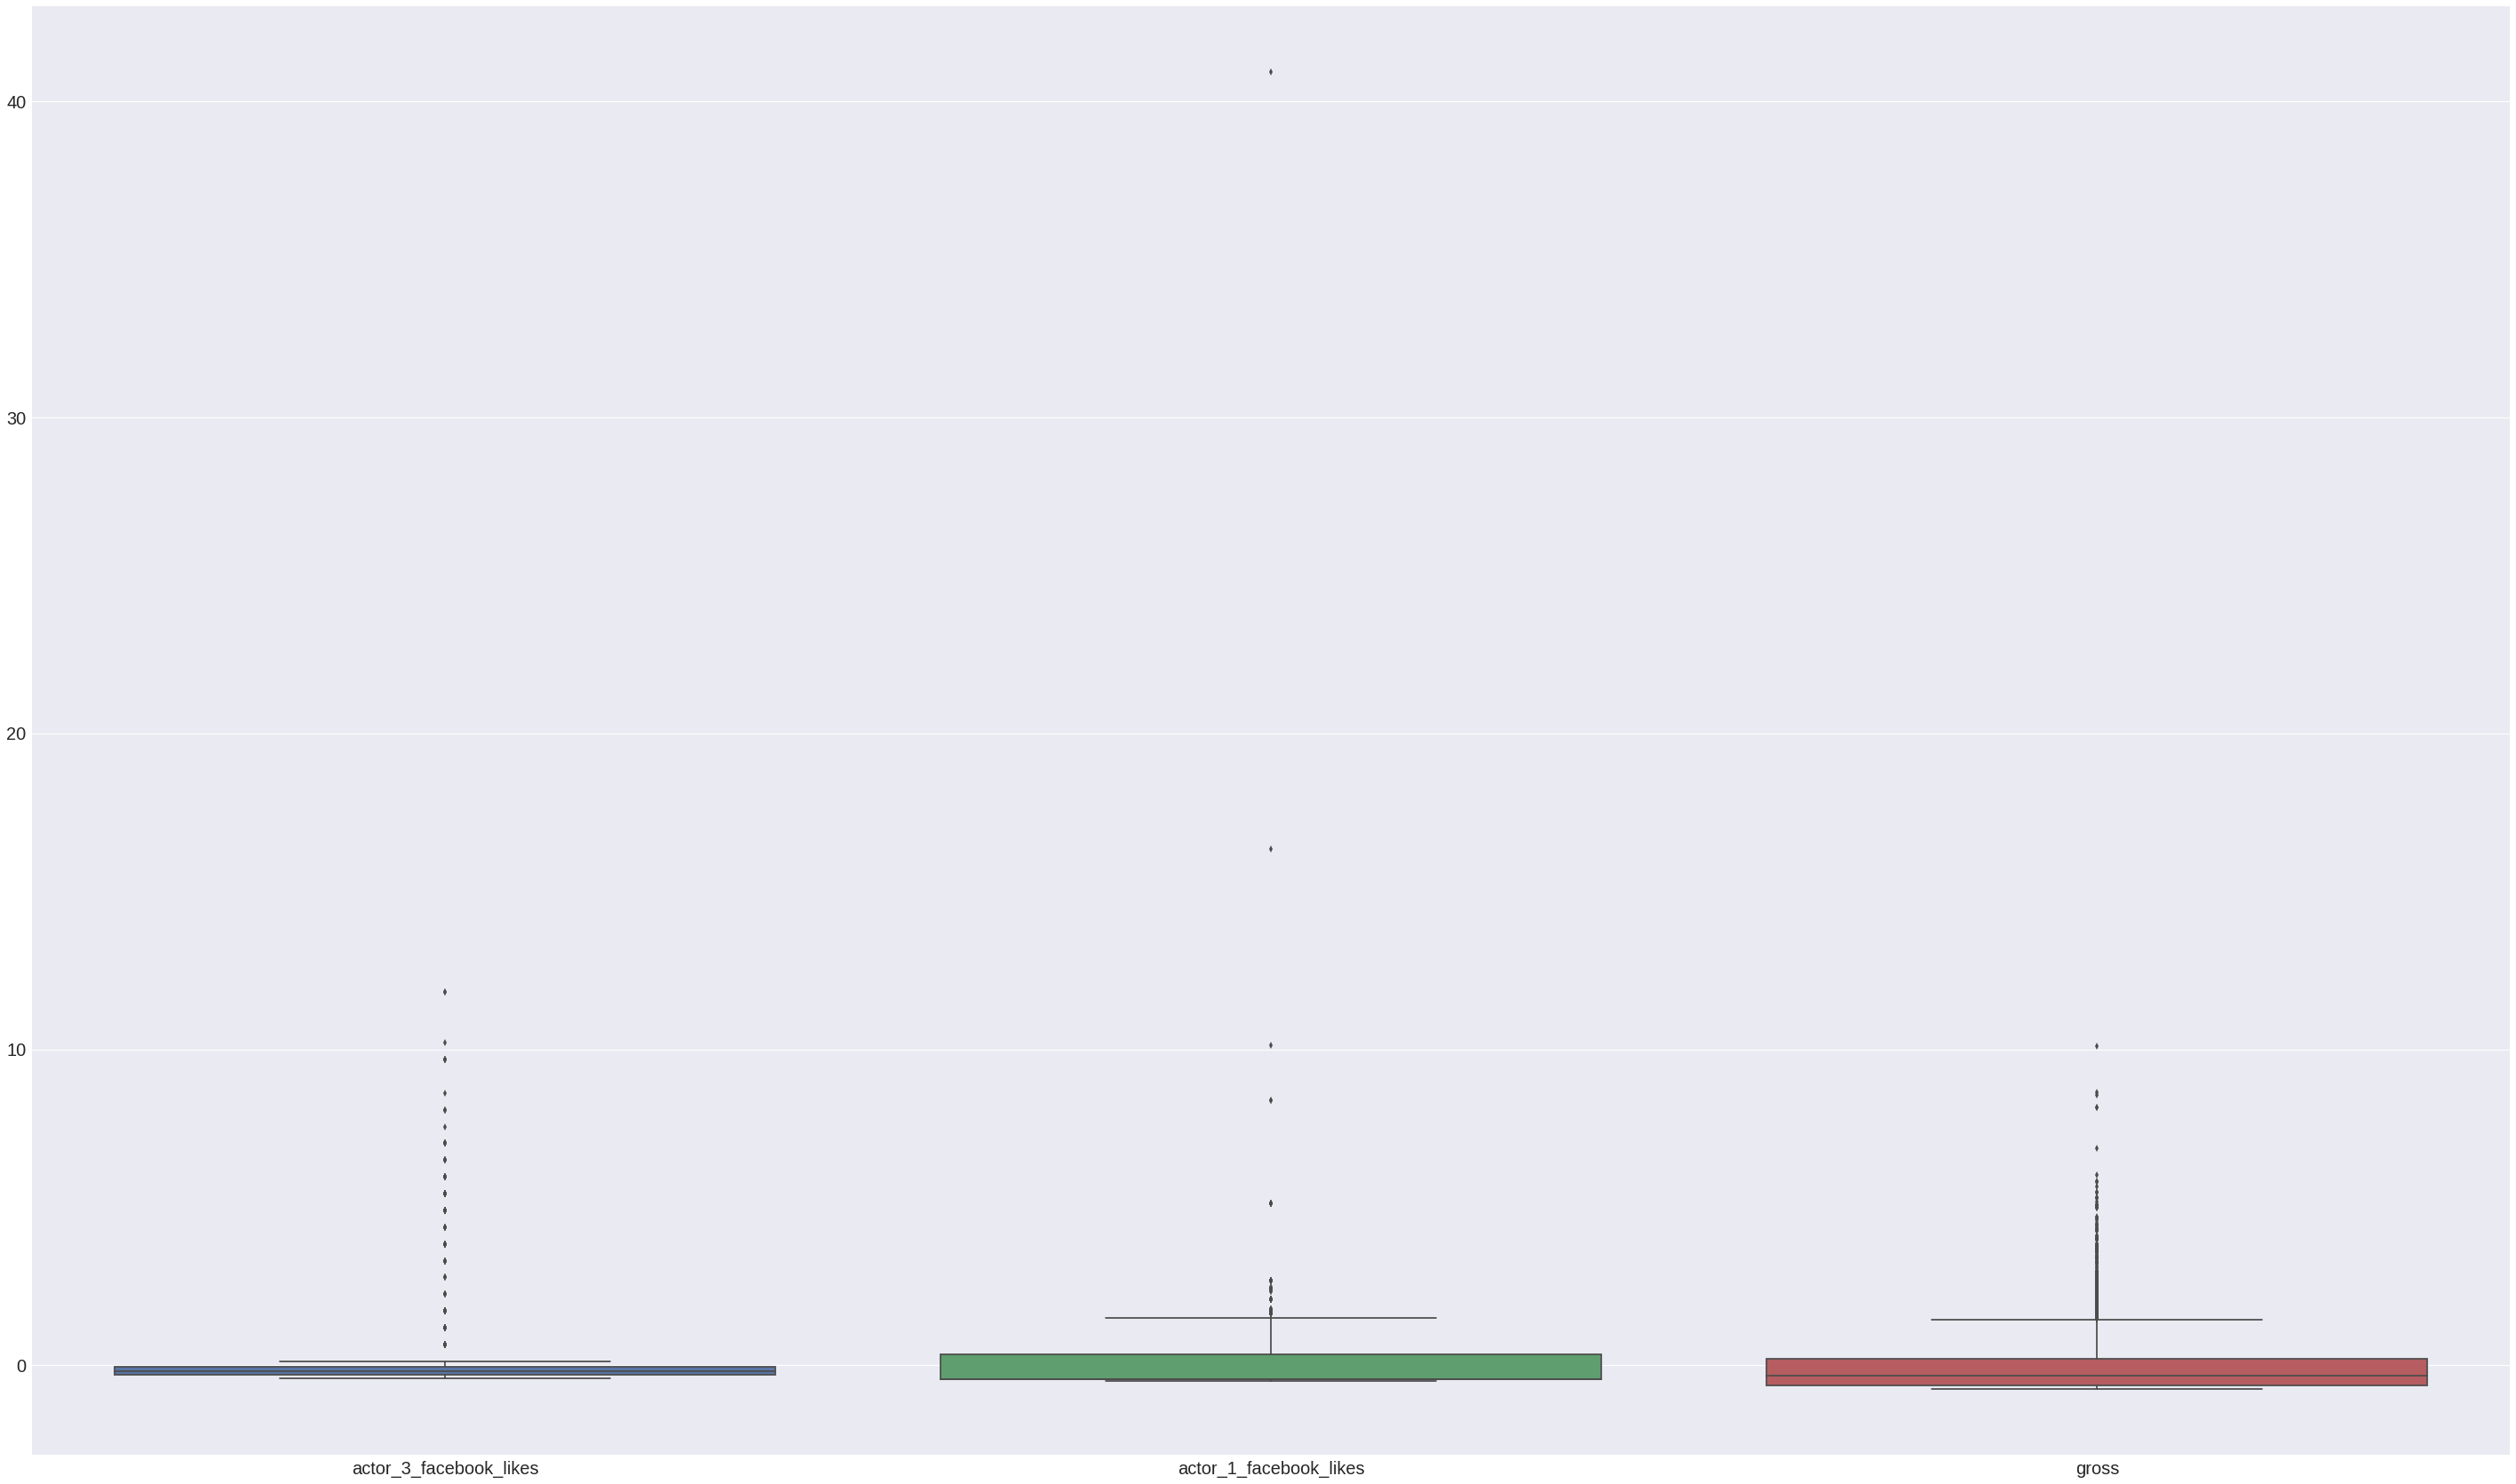

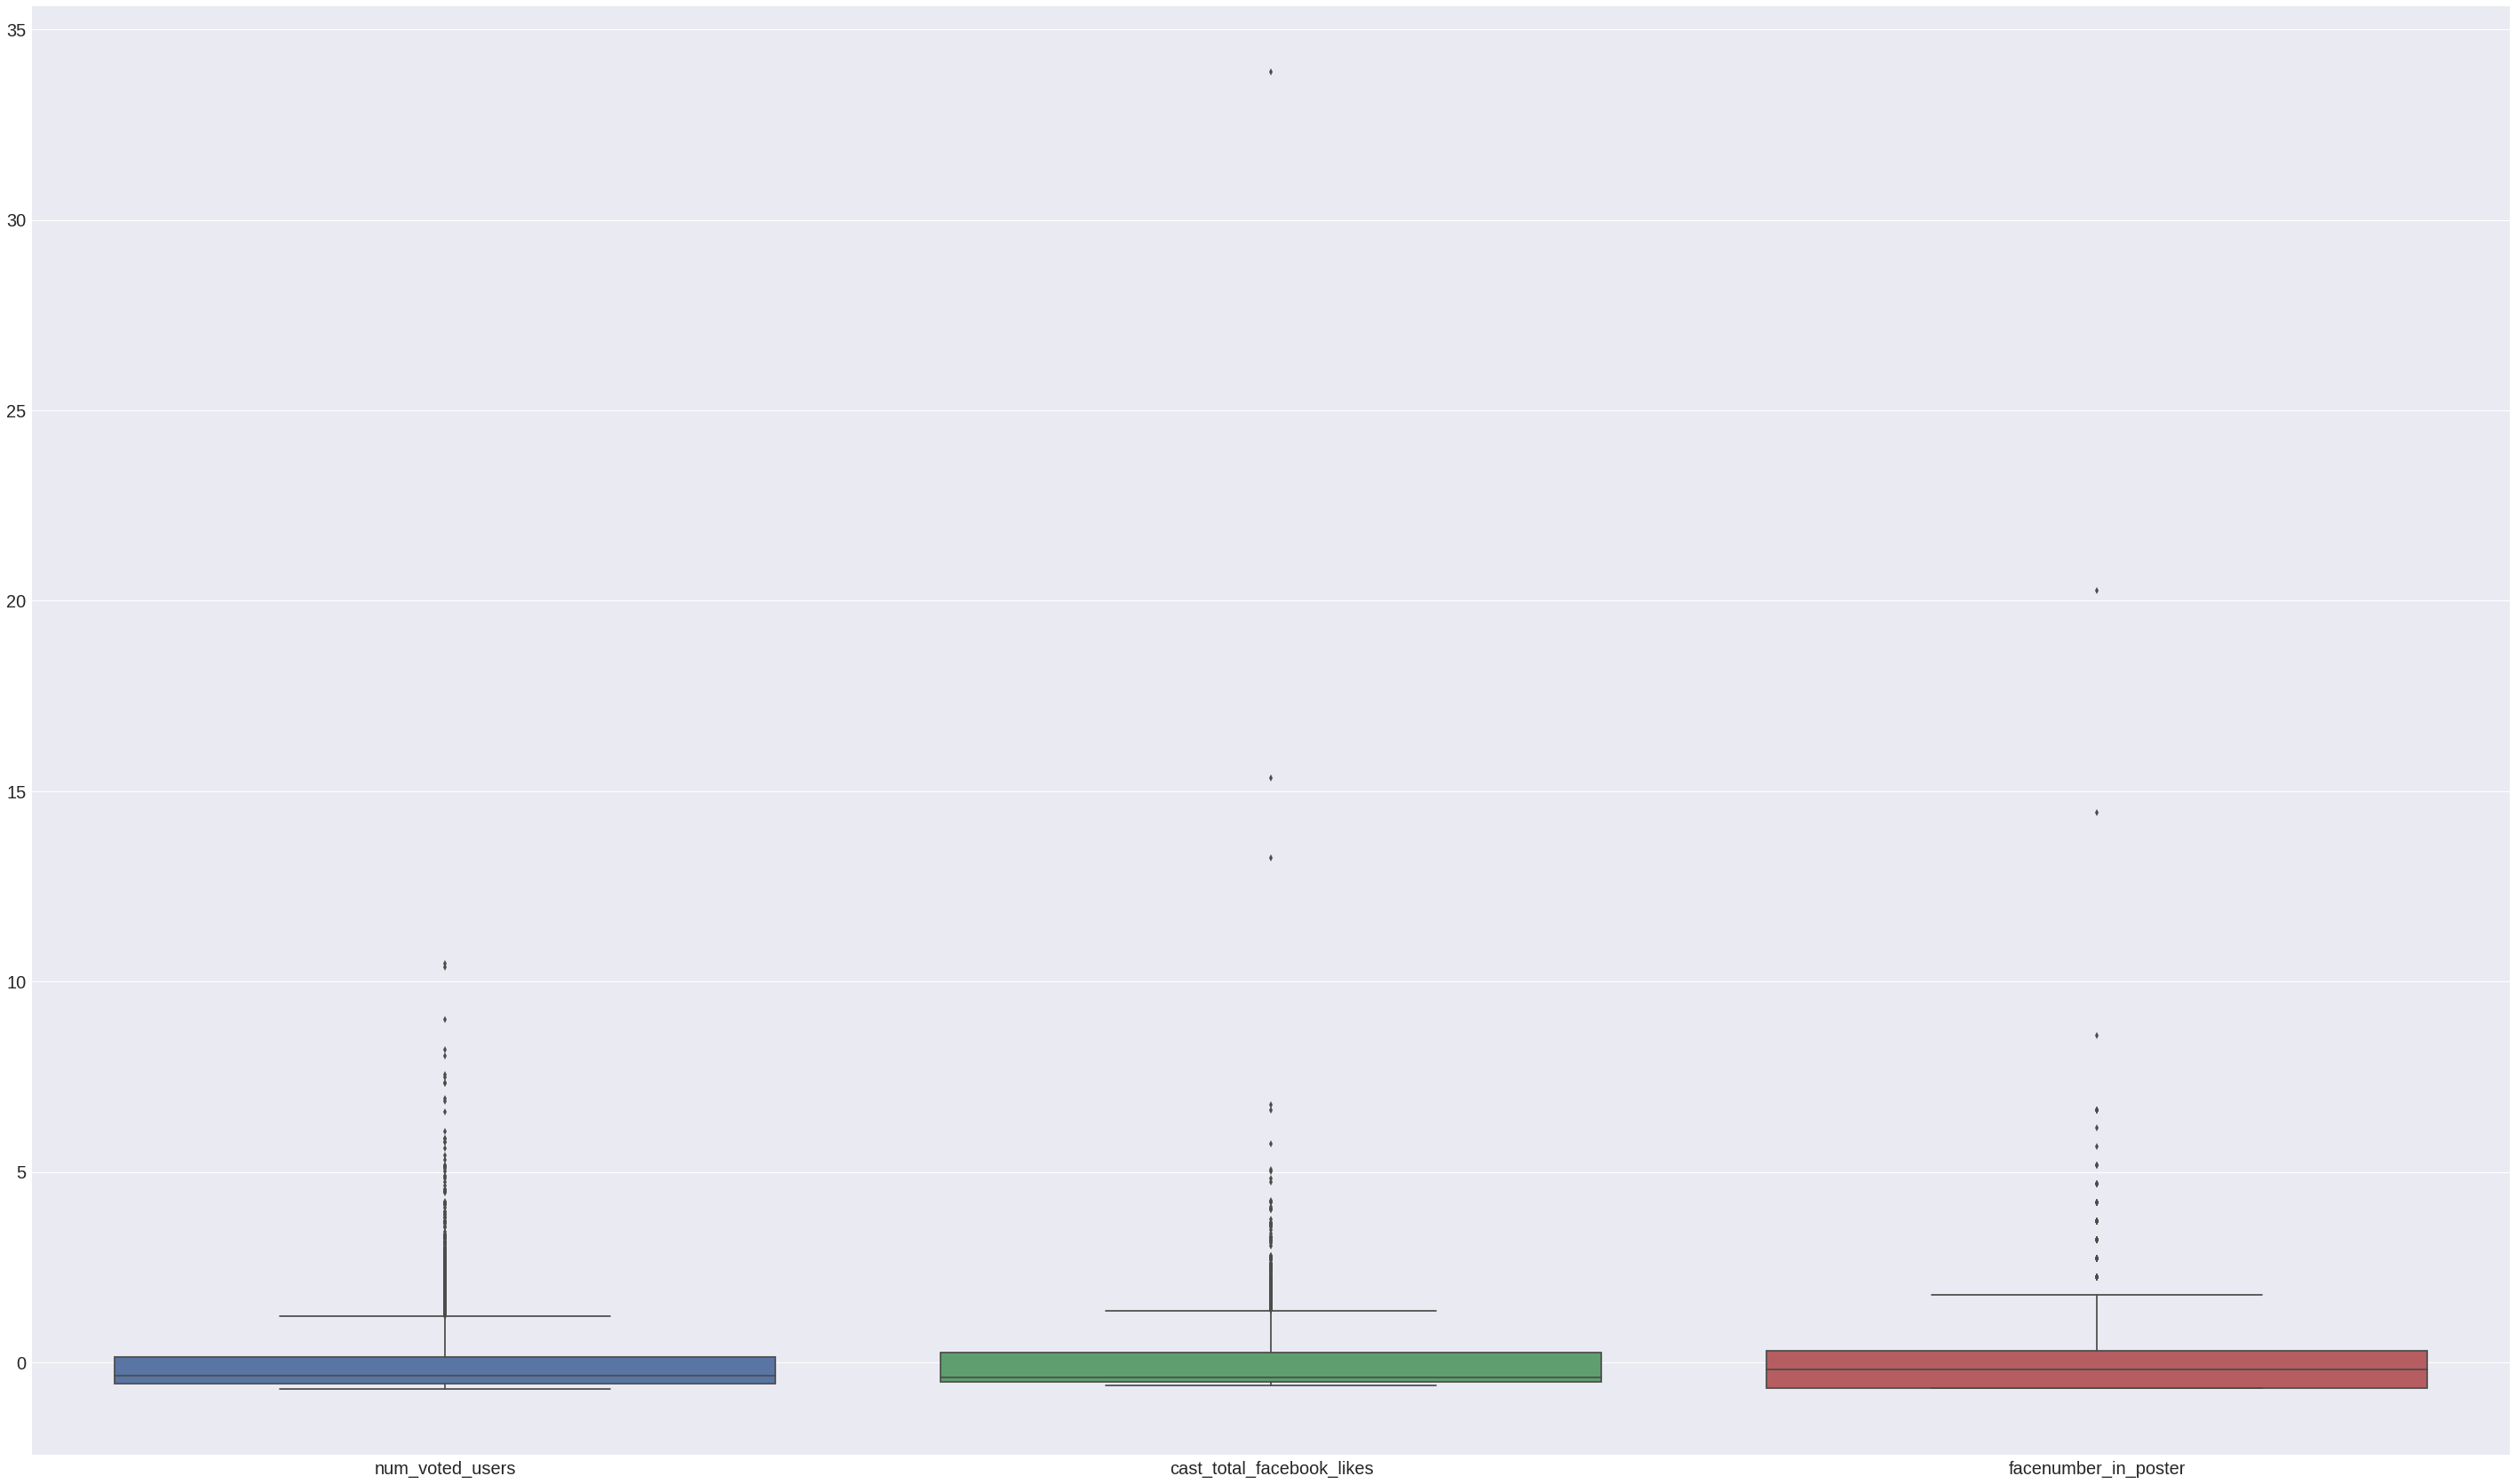

In [122]:
%matplotlib inline
f = plt.figure(figsize=(50,30))

sns.boxplot(data = df_std.iloc[:,:3]);
plt.figure(figsize=(50,30))
sns.boxplot(data = df_std.iloc[:,3:6]);
plt.figure(figsize=(50,30))
sns.boxplot(data = df_std.iloc[:,6:9]);

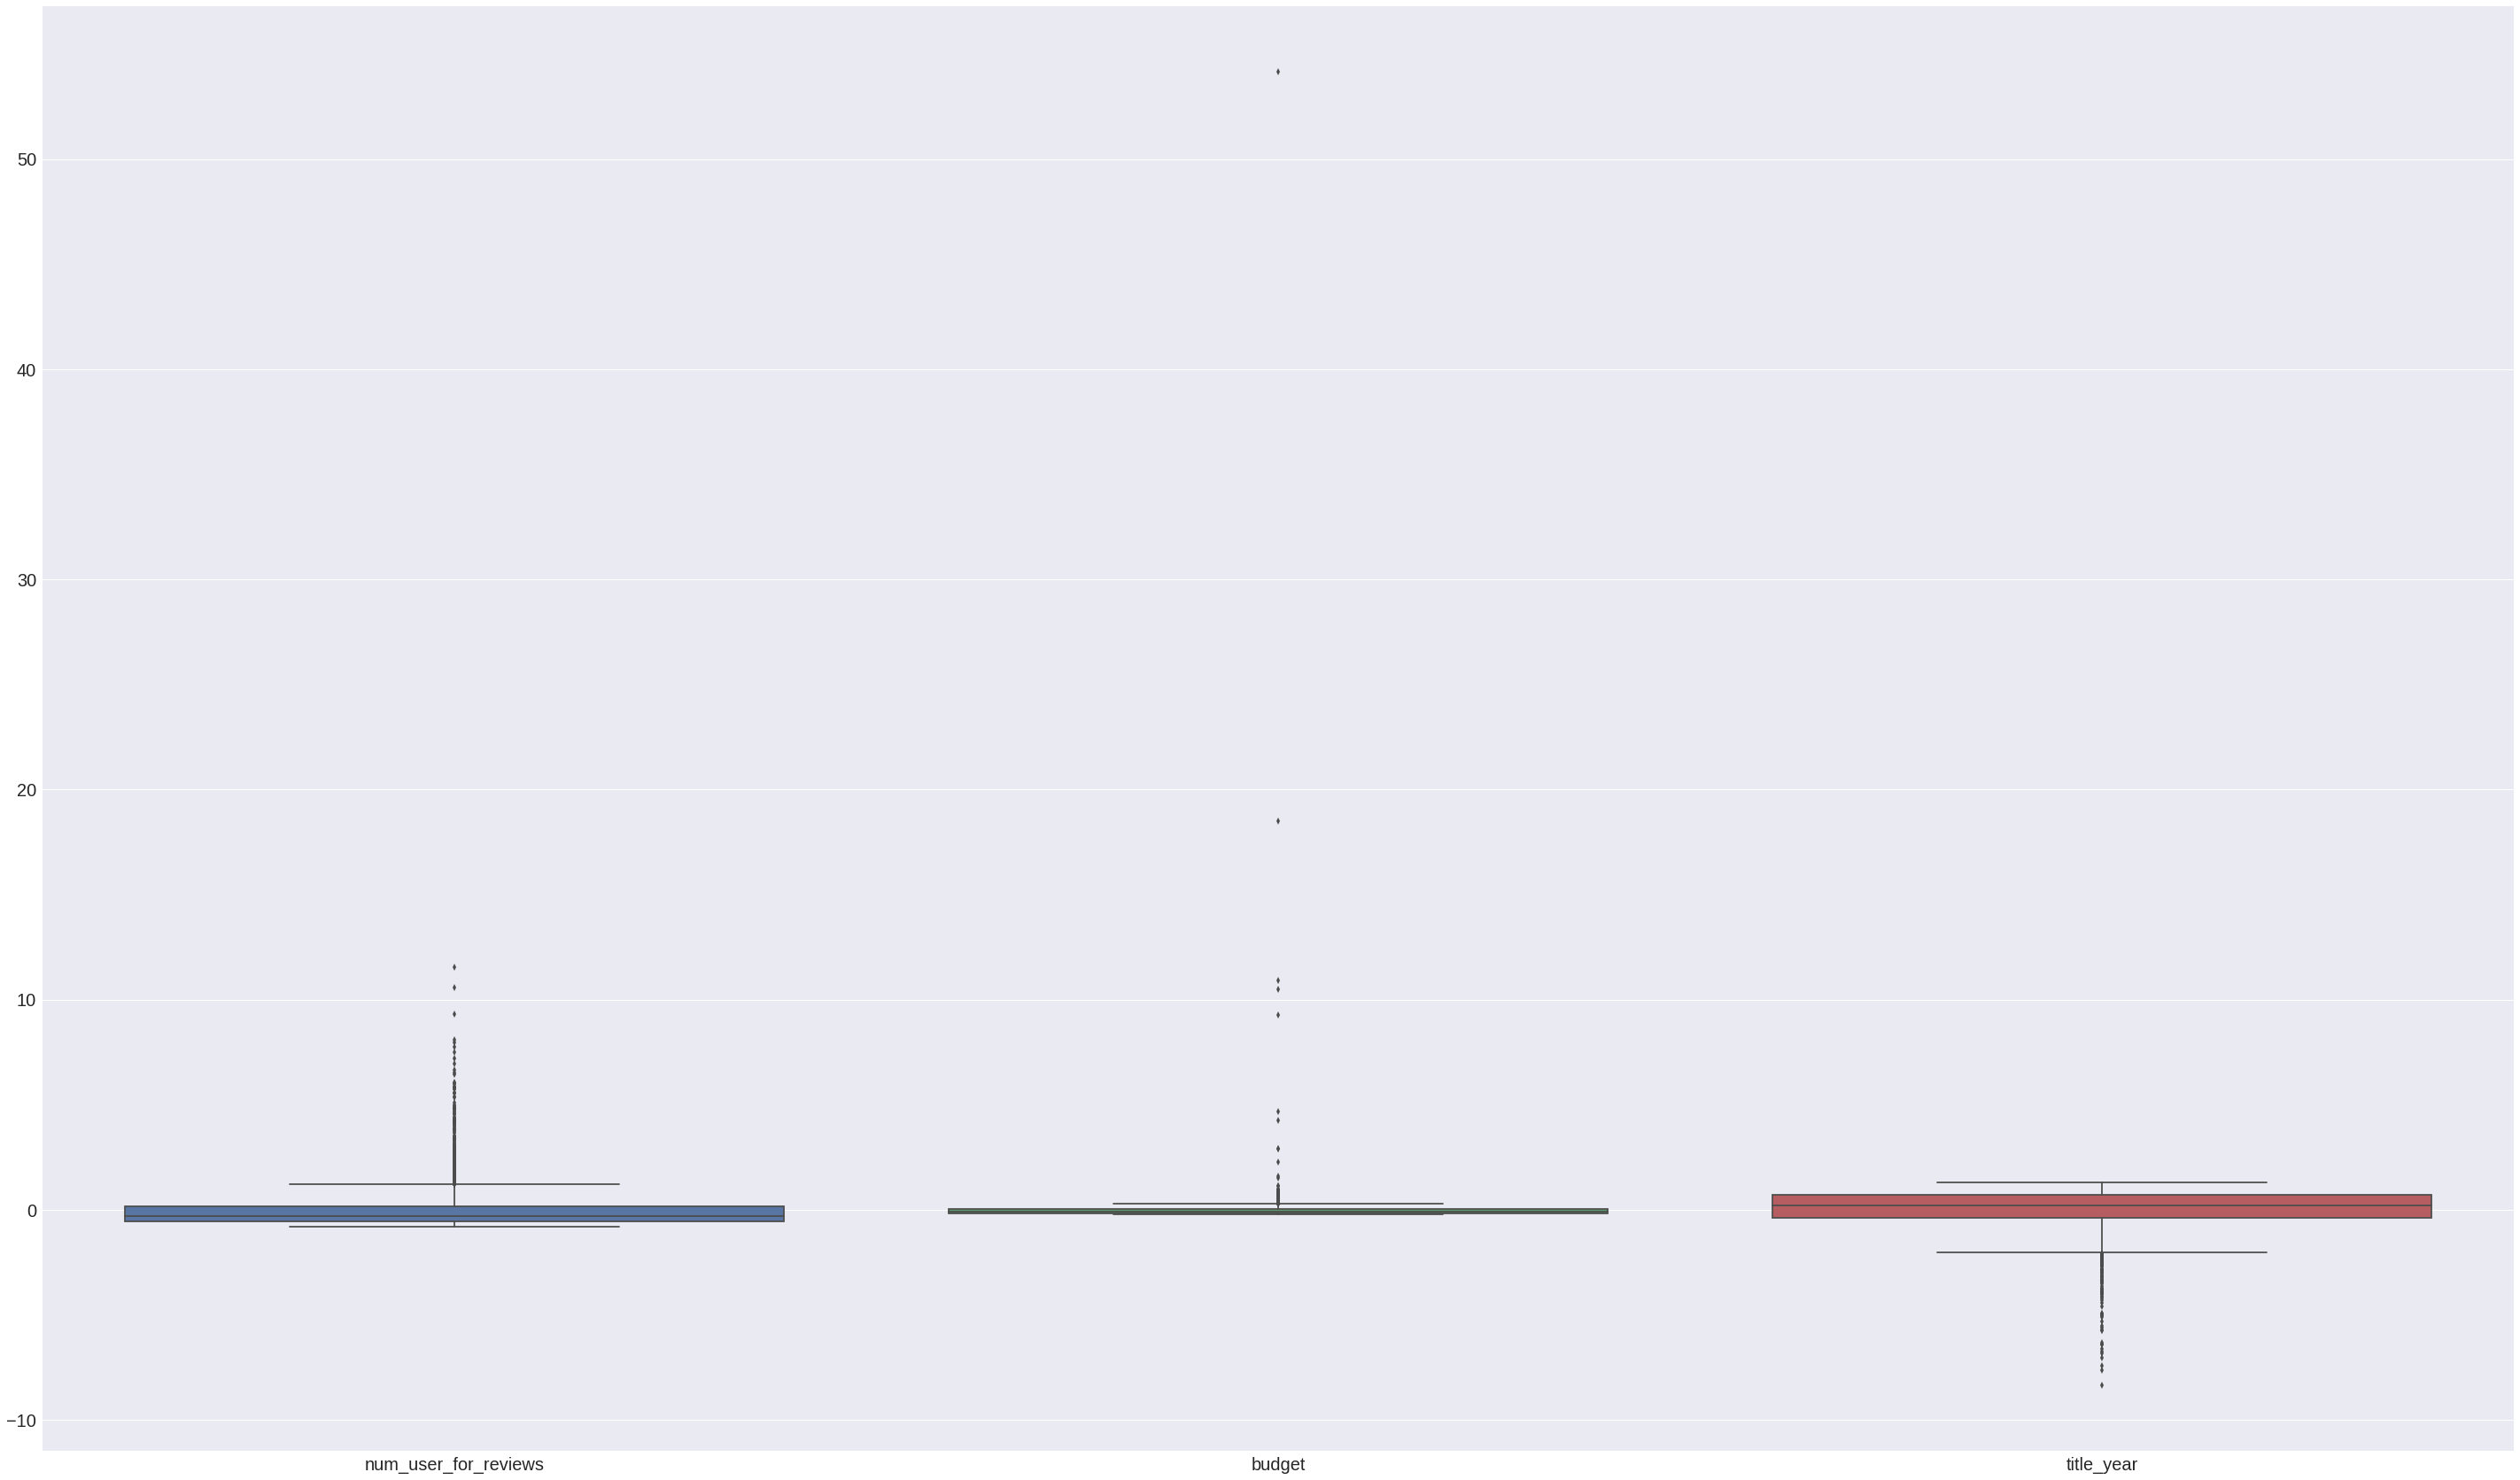

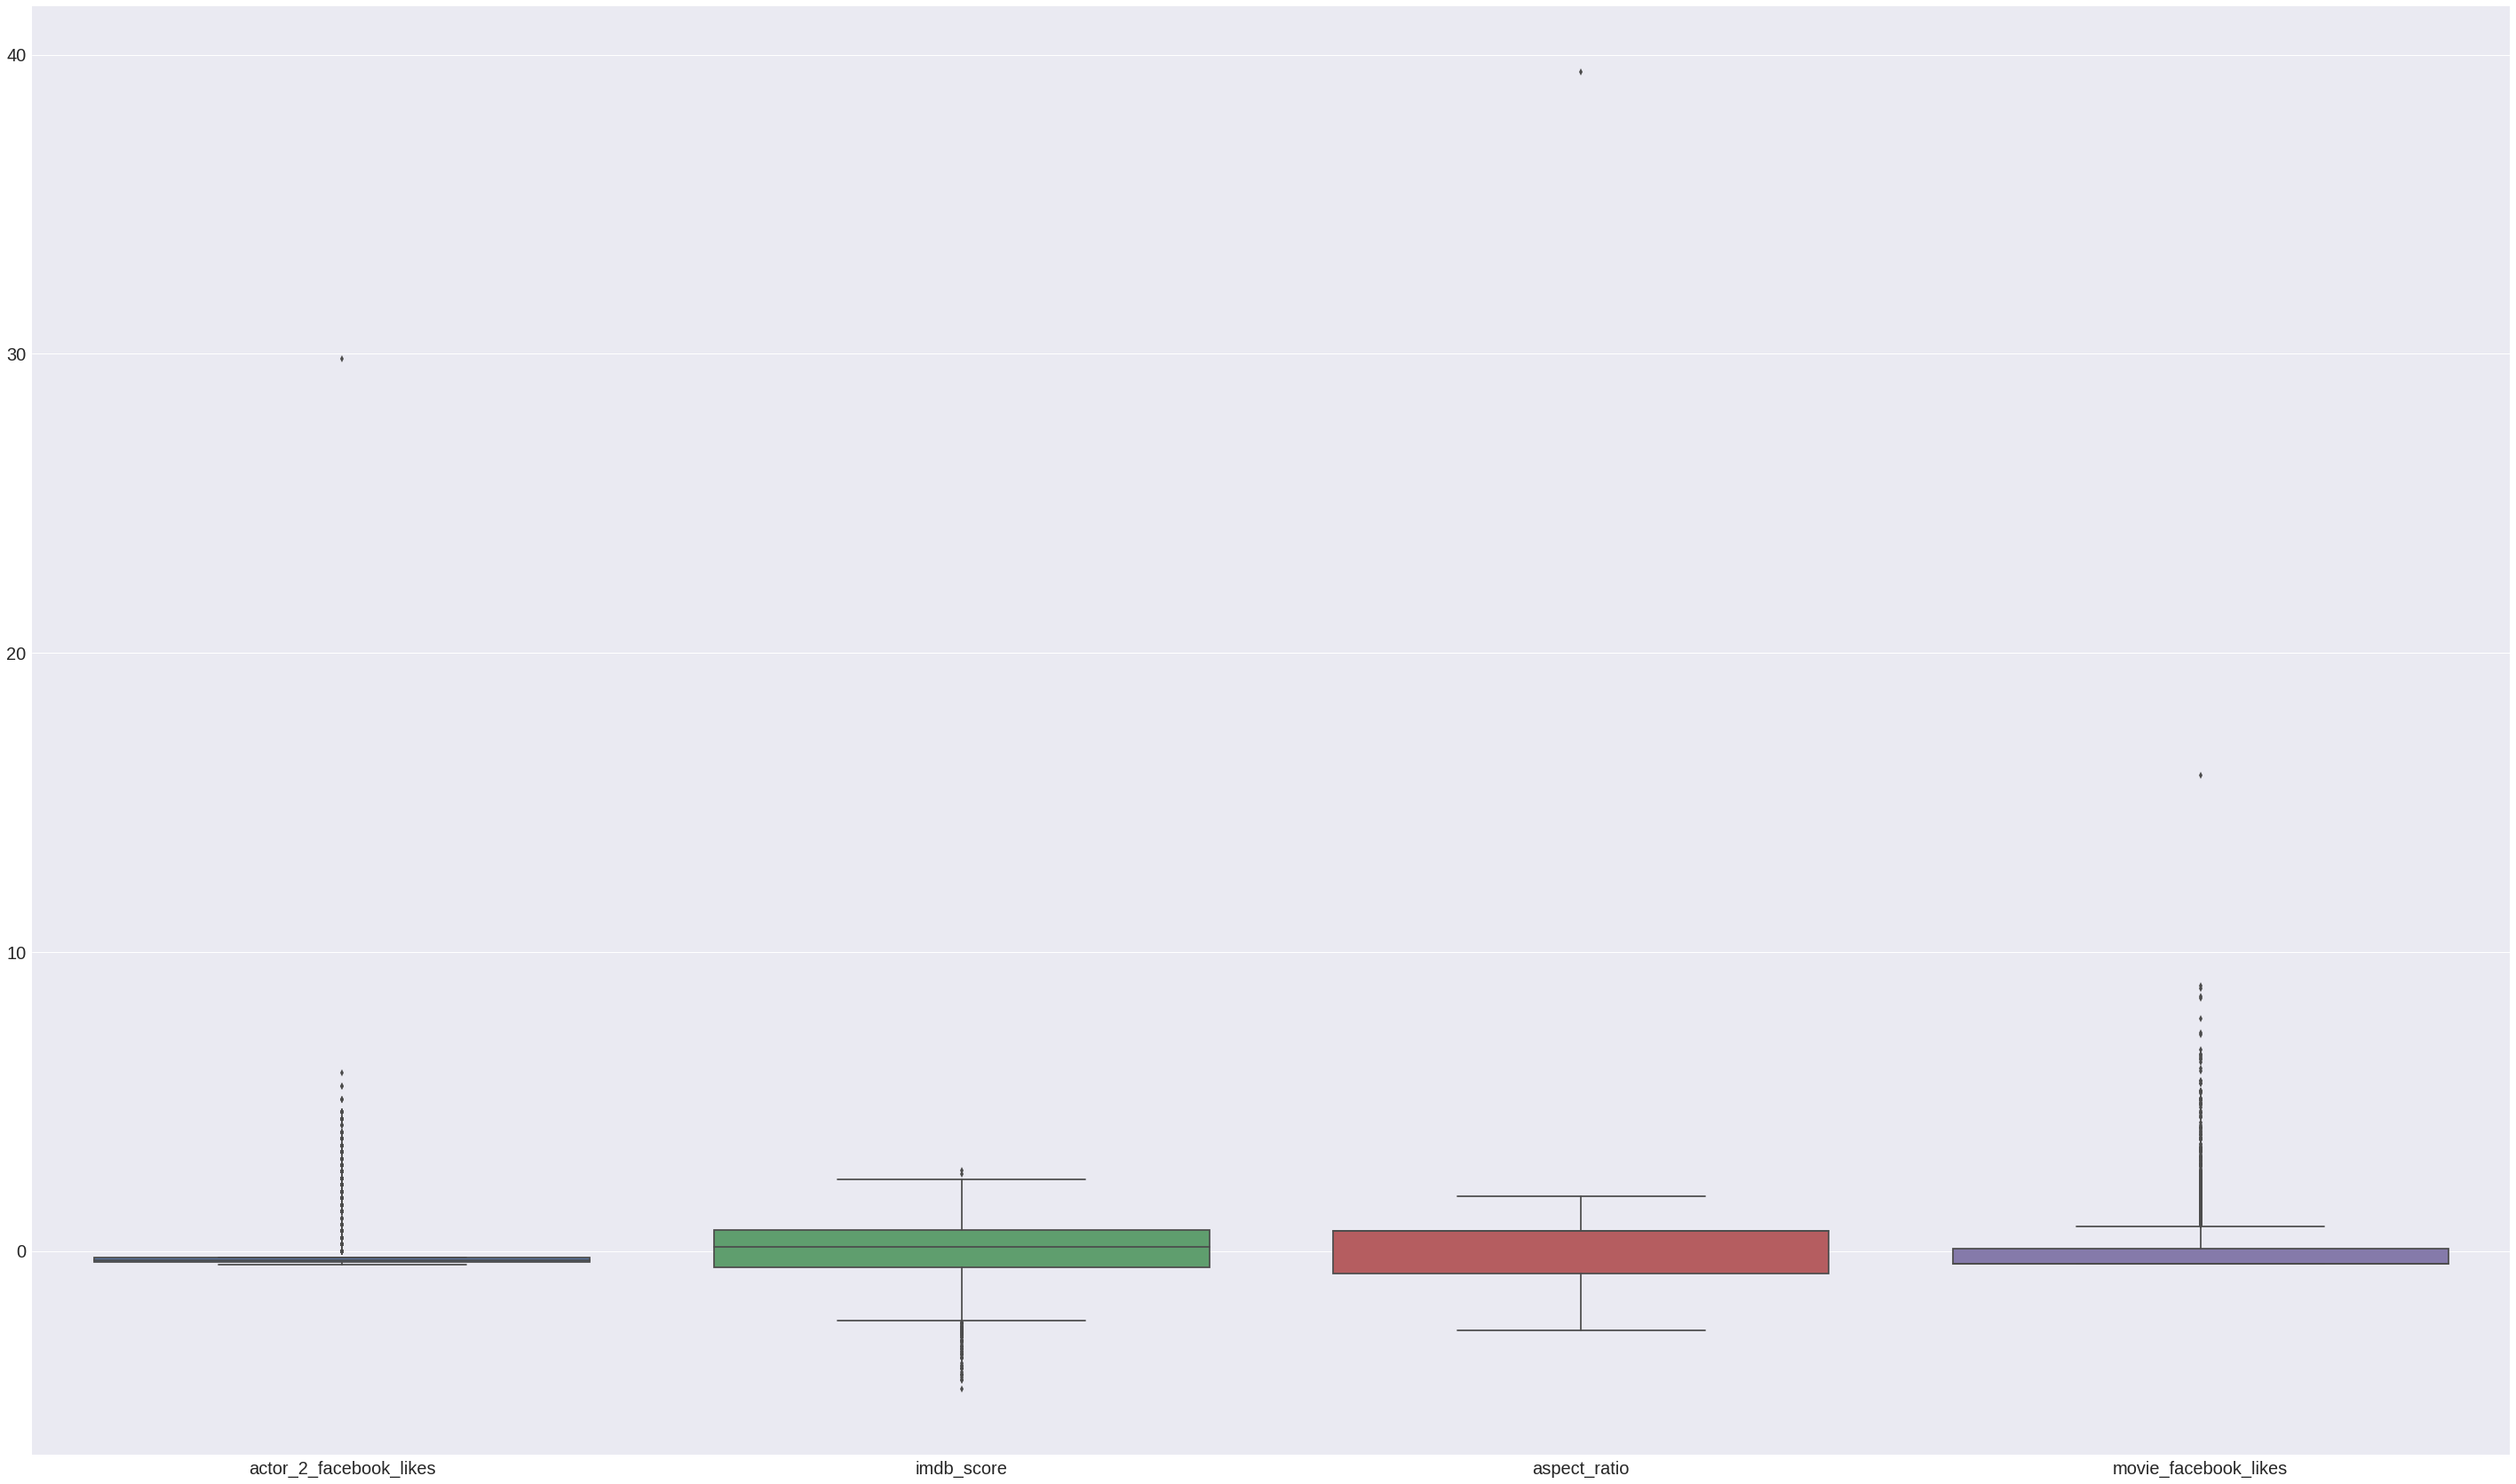

In [123]:
plt.figure(figsize=(50,30))
sns.boxplot(data = df_std.iloc[:,9:12]);
plt.figure(figsize=(50,30))
sns.boxplot(data = df_std.iloc[:,12:]);


The boxplot tells us that all the attributes contain outliers. These will have to be removed from the dataset, before plotting the histograms, to give a meaningfull insight as to wether or not the attributes are normal distributed

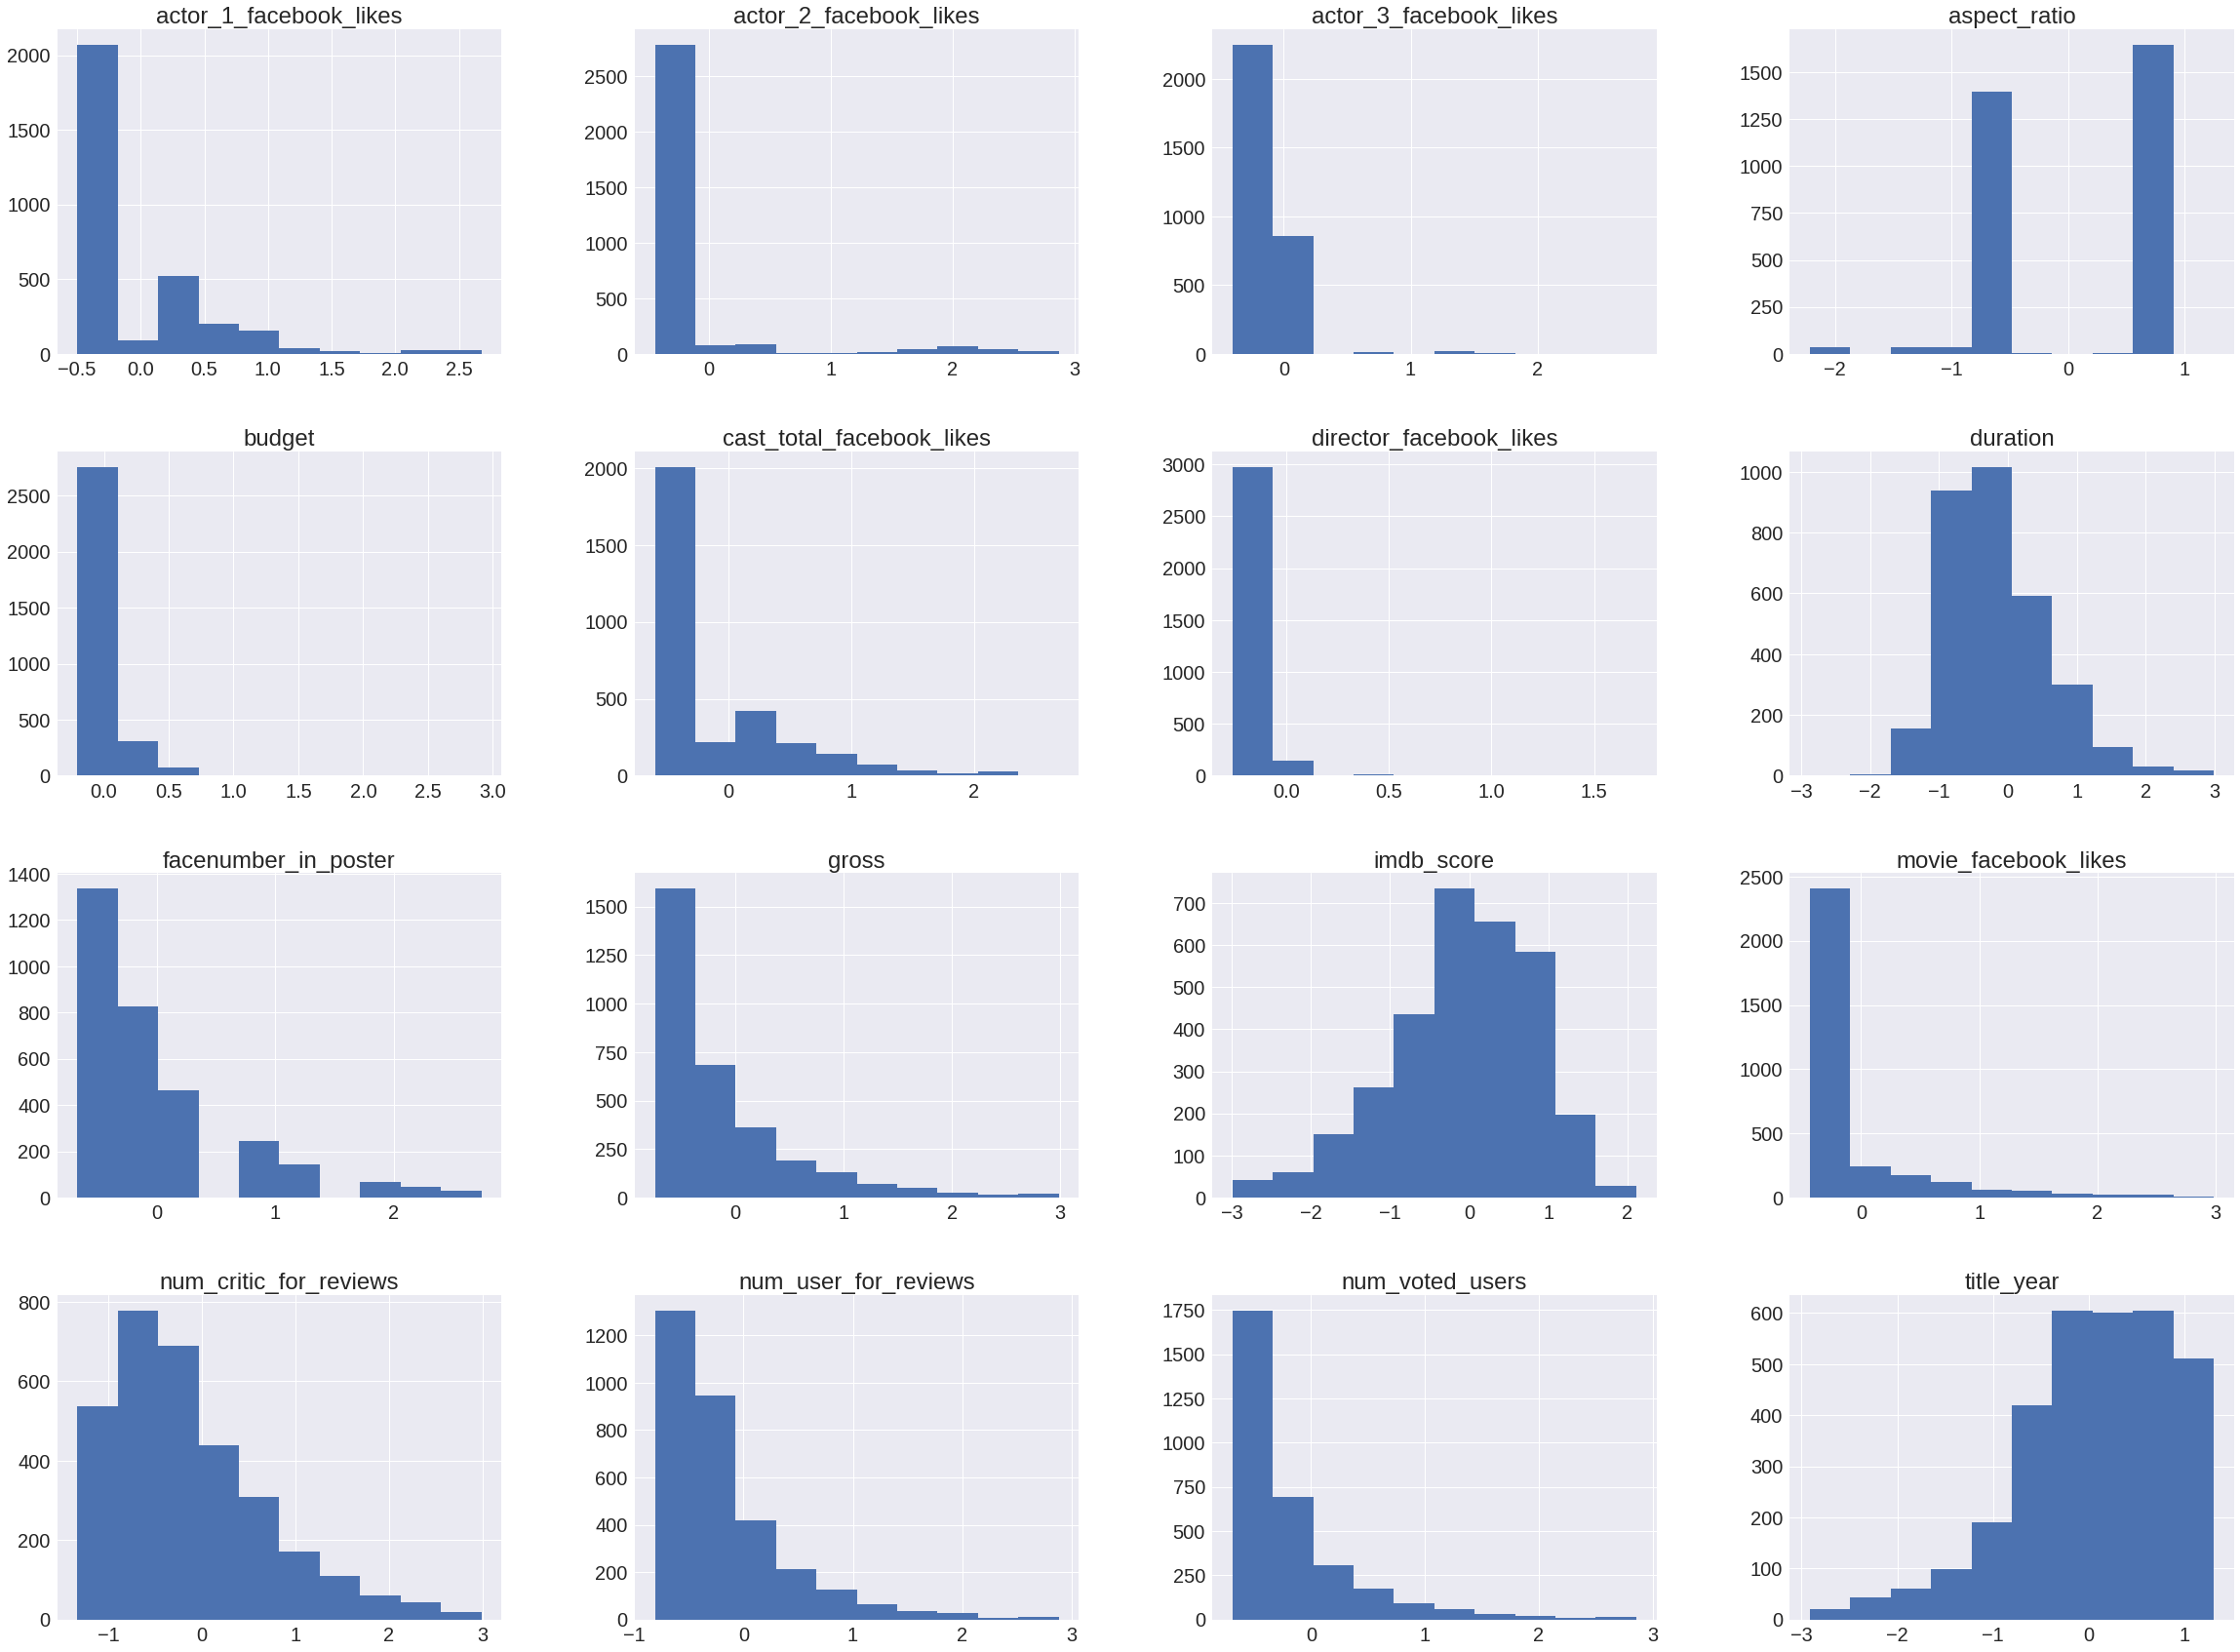

In [146]:
from scipy import stats
df_std_z = df_std[(np.abs(stats.zscore(df_std)) < 3).all(axis=1)]
df_std_z.hist(figsize=(40,30));

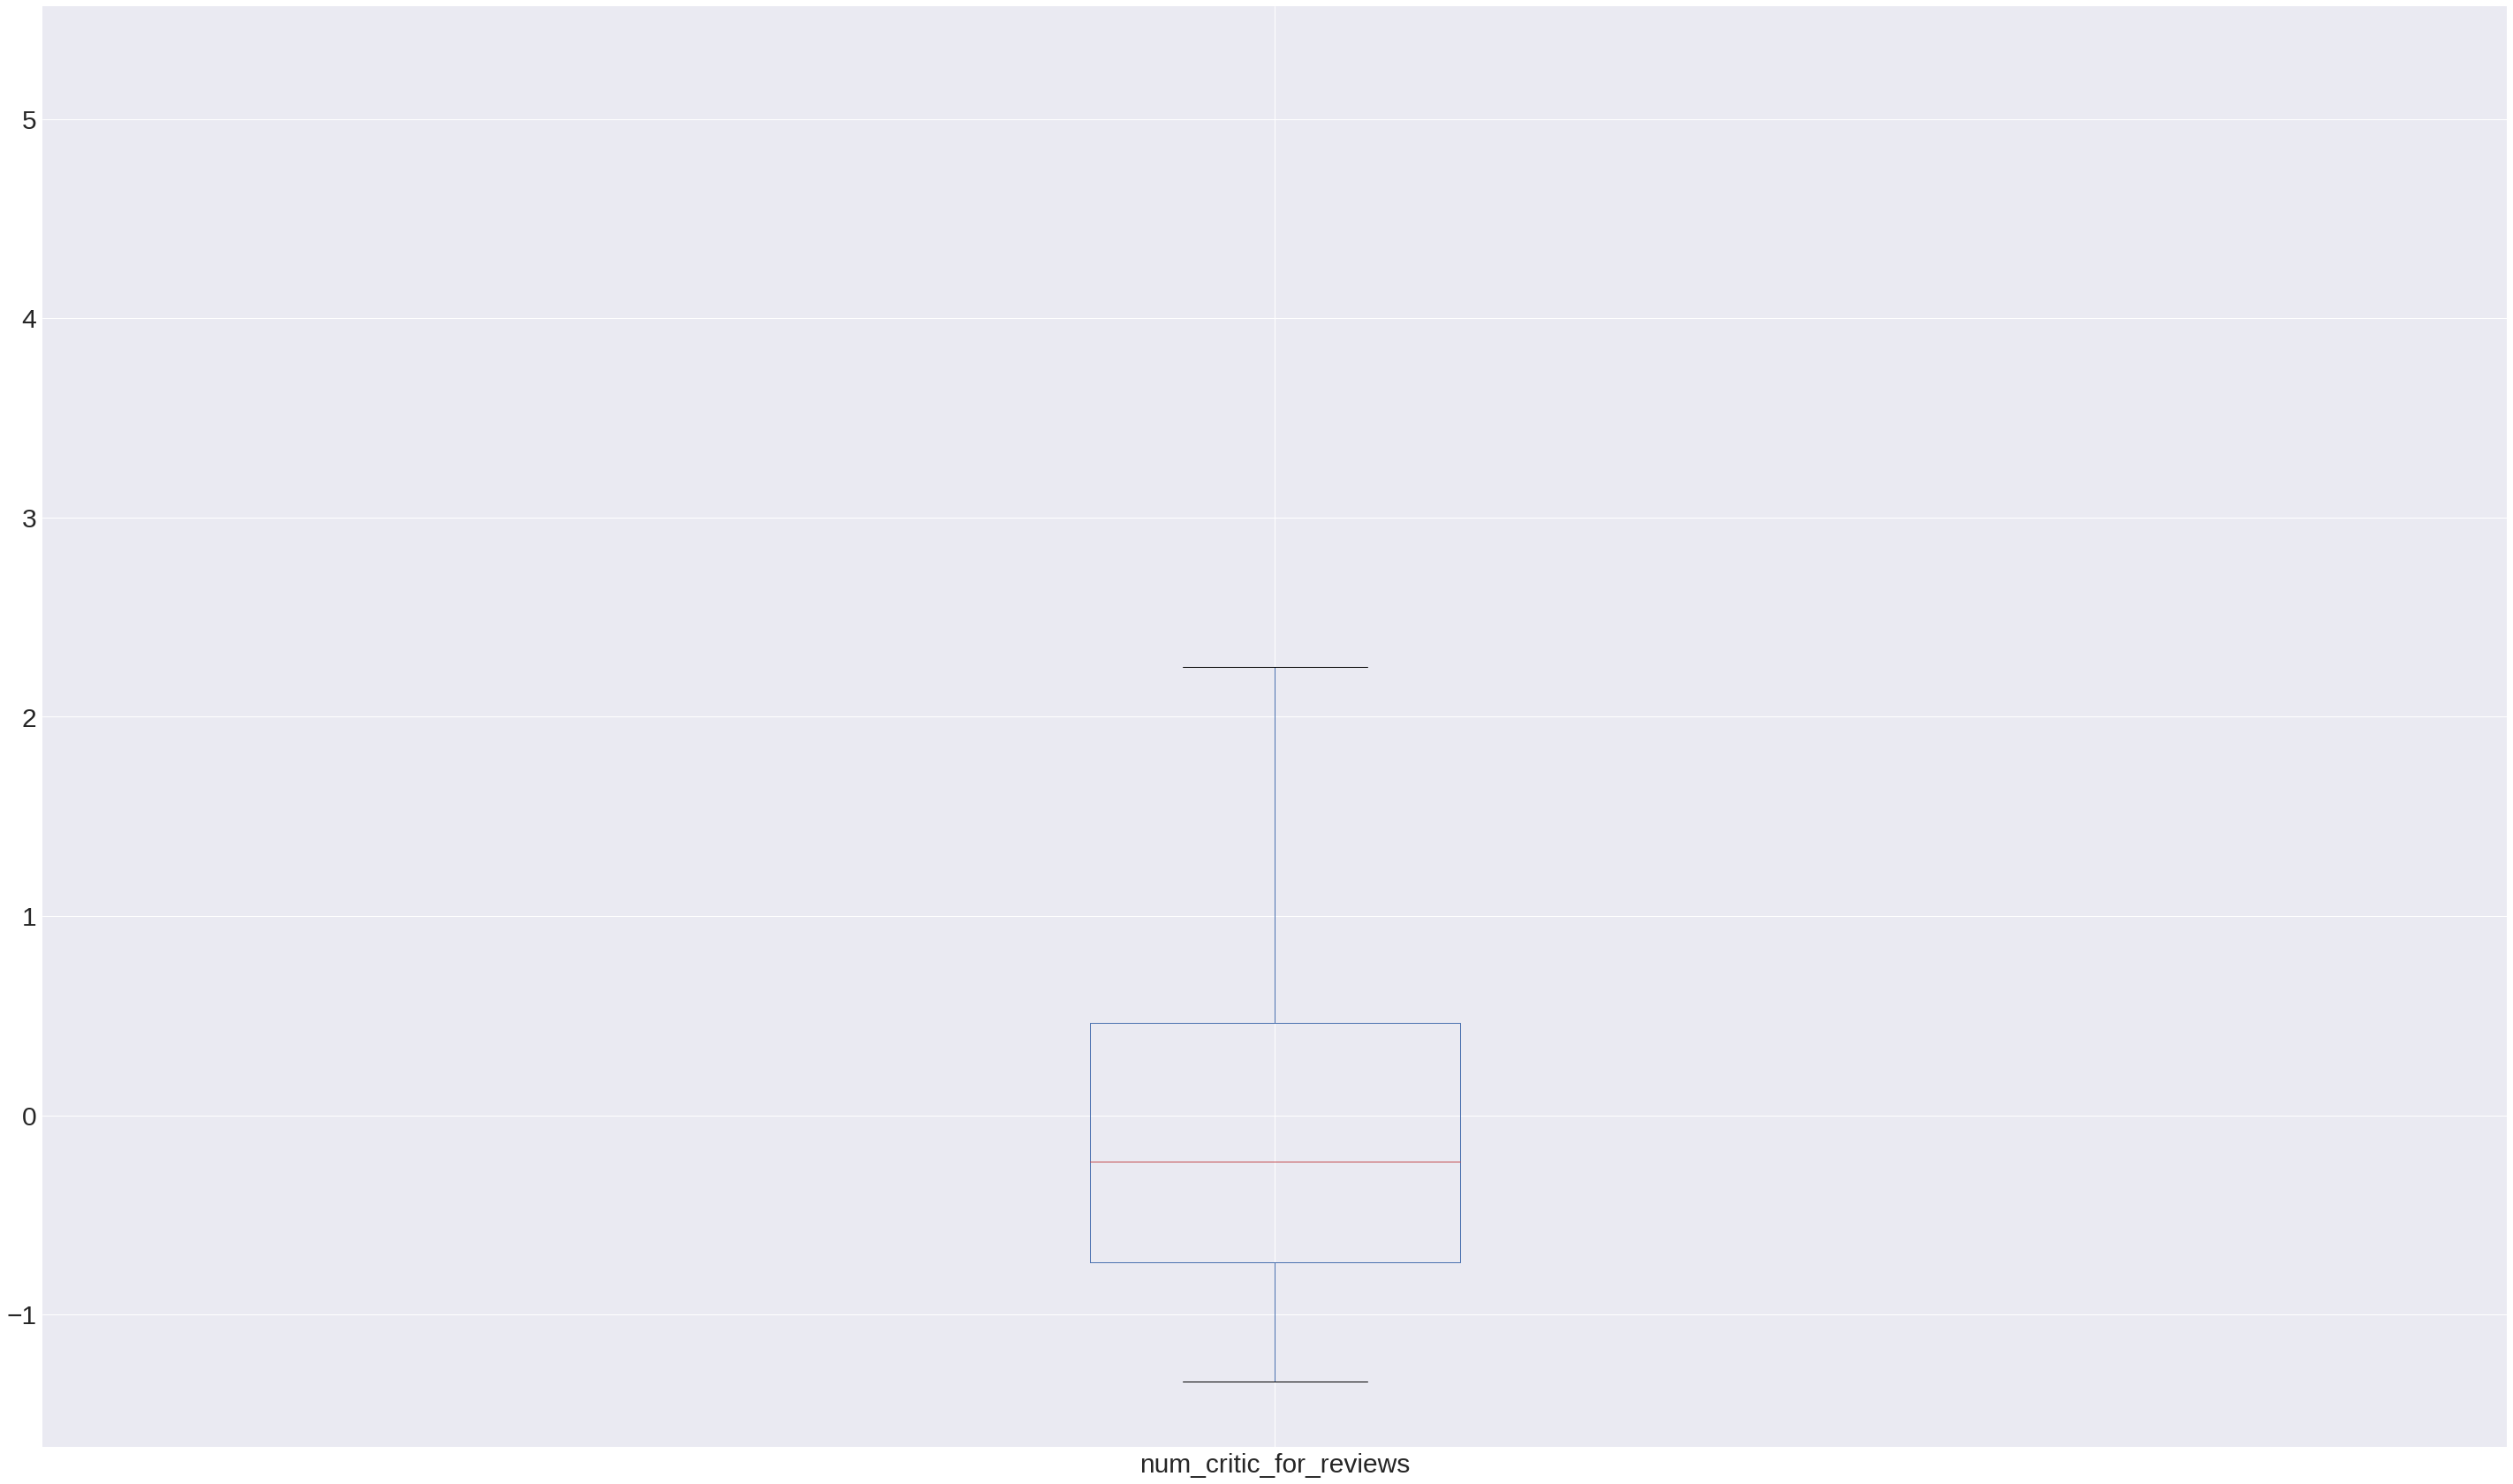

In [142]:
df_std.iloc[:,:1].plot(kind='box',figsize=(50,30), fontsize=30);